<a href="https://colab.research.google.com/github/ffathy-tdx/waiter-s-tips-prediction/blob/main/FinaltipsMLprojectwithKfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
This project explores a dataset where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all he recorded 244 tips.


---


#Acknowledgements
The data was reported in a collection of case studies for business statistics.

Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

The dataset is also available through the Python package Seaborn.


---
[Link to Github repository ](https://github.com/ffathy-tdx/waiter-s-tips-prediction)

# Importing libraries and loading the dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.pipeline import Pipeline

df = pd.read_csv('/content/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#Statistical Analysis

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#Checking for missing values

In [ ]:
print(df.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


# Insert imputer (filling missing values)
Here, we don't have any values. However, if there were any missing values, we would either drop or replace them., we can use many imputation techniques. Here, we'll fill any missing values with the mean value of the column.

---


# Dropping unnecessary columns
If there are any unnecessary columns that we don't need for our analysis or modeling, we can drop them using the drop() function.


In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-192-bf934754a5b1>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



#Exploratory Data Analysis (EDA)
Performing exploratory data analysis to understand the distribution and relationships in the dataset.

#Univariate Exploration
histogram plots for the tip amount and bill amount, which show the distribution of these variables individually. This satisfies the requirement of univariate exploration.

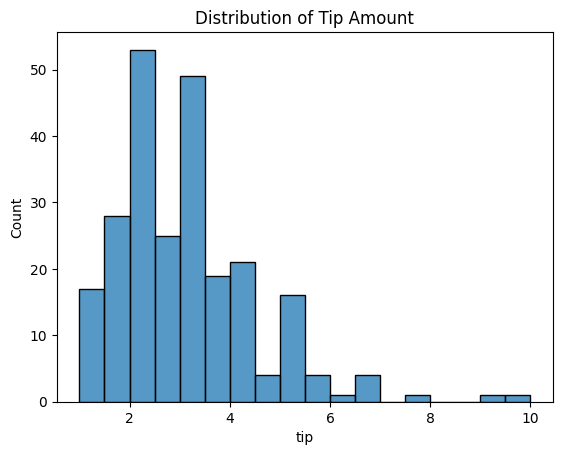

In [ ]:
sns.histplot(data=df, x='tip')
plt.title('Distribution of Tip Amount')
plt.show()

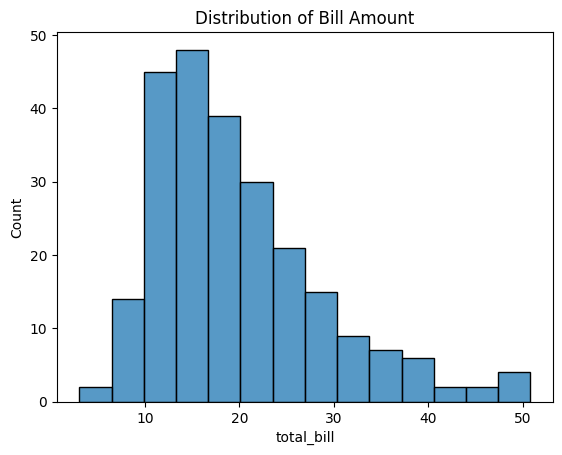

In [ ]:
sns.histplot(data=df, x='total_bill')
plt.title('Distribution of Bill Amount')
plt.show()

#Bivariate exploration
 box plots to analyze the relationship between the tip amount and the day of the week, as well as the time of day. This fulfills the requirement of bivariate exploration.

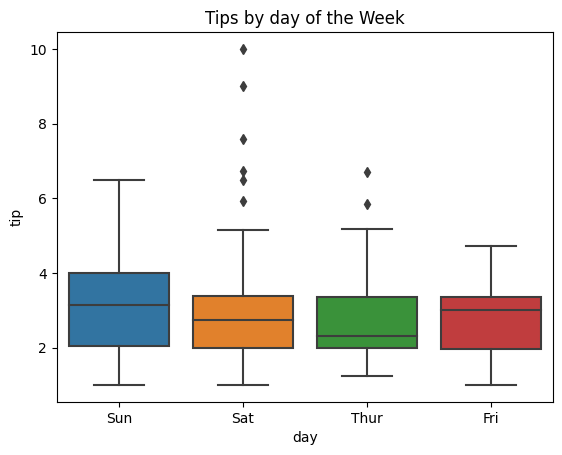

In [ ]:
sns.boxplot(data=df, x='day', y='tip')
plt.title('Tips by day of the Week')
plt.show()

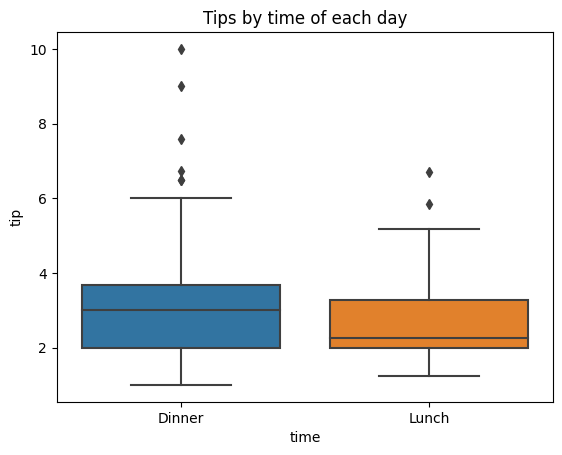

In [ ]:
sns.boxplot(data=df, x='time', y='tip')
plt.title('Tips by time of each day')
plt.show()

#Multivariate Exploration:

a bar plot that shows the relationship between the tip amount, customer gender, and smoker status. This covers a multivariate relationship.

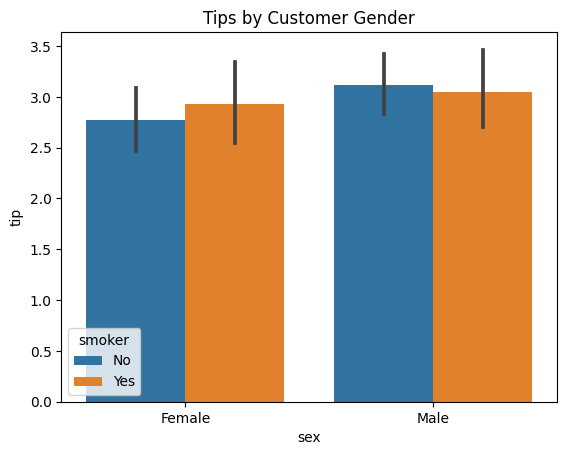

In [ ]:
sns.barplot(data=df, x='sex', y='tip', hue="smoker")

plt.title('Tips by Customer Gender')
plt.show()

a scatter plot that includes three variables: 'total_bill' on the x-axis, 'tip' on the y-axis, and the 'day' variable represented by color. Additionally, we are incorporating the 'size' variable by adjusting the size of the markers.

By visualizing the relationships between these four variables simultaneously, we are conducting multivariate exploration. 


In [ ]:
figure = px.scatter(data_frame = df, x="total_bill",y="tip", size="size", color= "day", trendline="ols")
figure.show()

Same as previous plot. But, instead of color coding the markers based on the 'day' variable, we color-code them based on the 'time' variable, representing different meal times (e.g., lunch or dinner).

In [ ]:
figure = px.scatter(data_frame = df, x="total_bill",y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [ ]:
figure = px.pie(df, values='tip', names='day')
figure.show()

In [ ]:
figure = px.pie(df, values='tip', names='sex')
figure.show()

In [ ]:
figure = px.pie(df, values='tip', names='smoker')
figure.show()

In [ ]:
figure = px.pie(df, values='tip', names='time')
figure.show()

<Axes: >

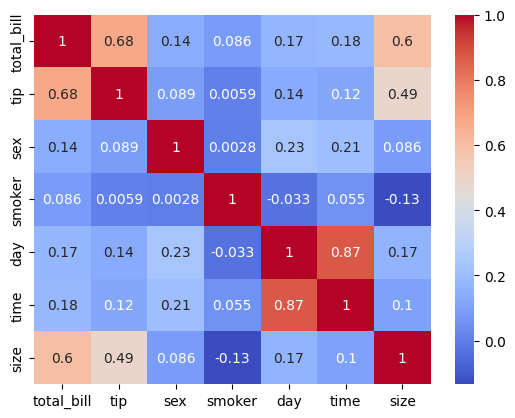

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)


Now we are done loading the tipping dataset, checking for missing values, and performing several EDA tasks. The box plots and bar plot reveal some potential relationships between tips and other variables such as day of the week, time of day, and customer gender.

Next, we can split the dataset into a training set and testing set and build our predictive model. But before that, we will map categorical variables to numerical values so they are easier to work with.





In [ ]:
df["sex"] = df["sex"].map({ "Male": 1, "Female": 0})
df["smoker"] = df["smoker"].map({"Yes": 1,"No": 0})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
177,14.48,2.00,1,1,3,1,2
123,15.95,2.00,1,0,0,0,2
179,34.63,3.55,1,1,3,1,2
161,12.66,2.50,1,0,3,1,2
145,8.35,1.50,0,0,0,0,2


In [ ]:
scaler = StandardScaler()
df[['total_bill', 'size']] = scaler.fit_transform(df[['total_bill', 'size']])


# Split the data into training and test sets

In [ ]:
X = df[["total_bill", "sex", "smoker", "day", "time", "size"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(len(X_test))
print(len(y_test))

49
49


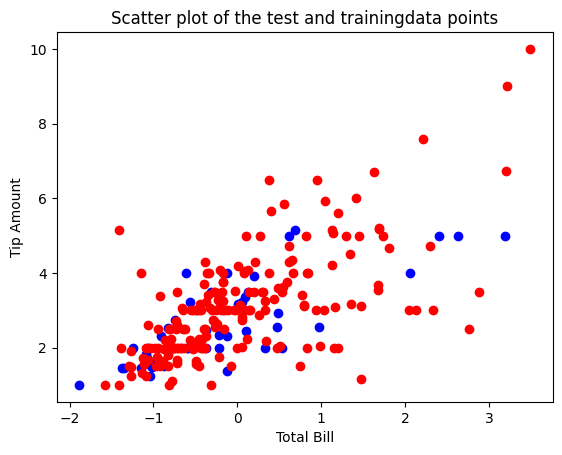

In [ ]:
plt.scatter(X_test["total_bill"], y_test, color='b')
plt.scatter(X_train["total_bill"], y_train, color='r')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Scatter plot of the test and trainingdata points')
plt.show()

# Regularization test using LASSO


In [ ]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
print("LASSO R-squared:", lasso_r2)
print("LASSO Mean Absolute Error (MAE):", lasso_mae)

LASSO R-squared: -0.15896098636013822
LASSO Mean Absolute Error (MAE): 1.047104133961277


# Regularization test using Elastic Net


In [ ]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
elasticnet_predictions = elasticnet_model.predict(X_test)
elasticnet_r2 = r2_score(y_test, elasticnet_predictions)
elasticnet_mae = mean_absolute_error(y_test, elasticnet_predictions)
print("Elastic Net R-squared:", elasticnet_r2)
print("Elastic Net Mean Absolute Error (MAE):", elasticnet_mae)

Elastic Net R-squared: 0.23121469194860722
Elastic Net Mean Absolute Error (MAE): 0.8644044924464374


# Feature normalization


In [ ]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

#Applying grid search using a lasso model
searching for the best hyperparameter values for the Lasso regression model based on the specified parameter grid. The best parameters are determined by evaluating the model's performance using cross-validation.

In [ ]:
parameters = {'alpha': [0.01, 0.1, 1, 10]}
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, parameters, cv=kf)
grid_search.fit(df[['total_bill', 'size']], df['tip'])
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'alpha': 0.1}


# OLS model


In [ ]:
X_ols = sm.add_constant(X_train_normalized)
model_ols = sm.OLS(y_train, X_ols).fit()
y_ols_pred = model_ols.predict(sm.add_constant(X_test))
r2_ols = r2_score(y_test, y_ols_pred)


#Polynomial Regression model

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model_poly = LinearRegression().fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_poly_pred = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_poly_pred)

#Random Forest model

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = mean_squared_error(y_test, y_pred_rf)

#SVR model

In [ ]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

r2_svr = mean_squared_error(y_test, y_pred_svr)

#Comparison of Predicted Tip Amounts with Actual Values

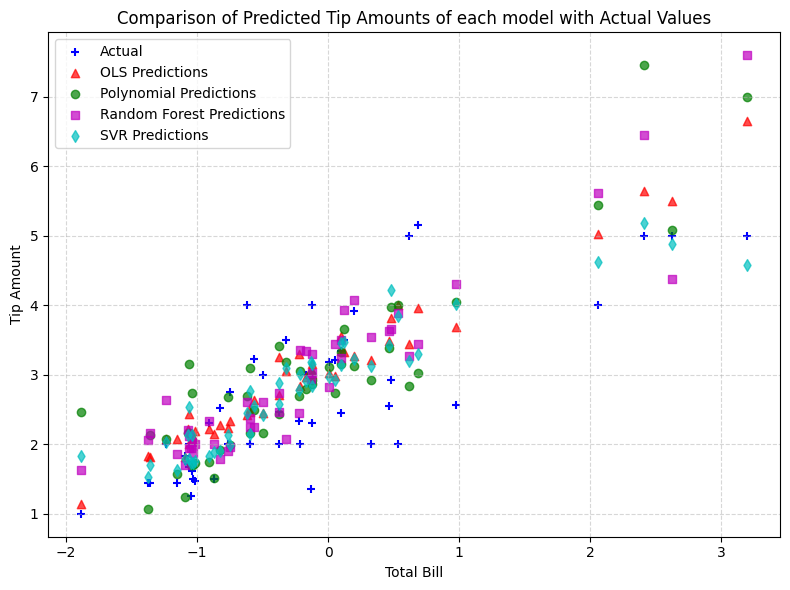

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test["total_bill"], y_test, color='b', label='Actual', marker='+', alpha=1)
plt.scatter(X_test["total_bill"], y_ols_pred, color='r', label='OLS Predictions', marker='^', alpha=0.7)
plt.scatter(X_test["total_bill"], y_poly_pred, color='g', label='Polynomial Predictions', marker='o', alpha=0.7)
plt.scatter(X_test["total_bill"], y_pred_rf, color='m', label='Random Forest Predictions', marker='s', alpha=0.7)
plt.scatter(X_test["total_bill"], y_pred_svr, color='c', label='SVR Predictions', marker='d', alpha=0.7)

plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Comparison of Predicted Tip Amounts of each model with Actual Values')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

#Comparing between the different models and choosing the best one based on r2 score and Mean Absolute Error.

In [ ]:
y_ols_pred = model_ols.predict(sm.add_constant(X_test))
y_poly_pred = model_poly.predict(X_test_poly)
y_pred_rf = rf_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

r2_ols = r2_score(y_test, y_ols_pred)
r2_poly = r2_score(y_test, y_poly_pred)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svr = r2_score(y_test, y_pred_svr)

mae_ols = mean_absolute_error(y_test, y_ols_pred)
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_svr = mean_absolute_error(y_test, y_pred_svr)


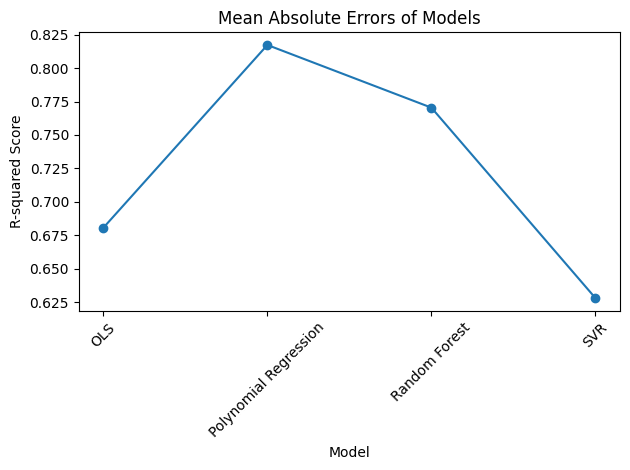

In [ ]:
models = ['OLS', 'Polynomial Regression', 'Random Forest', 'SVR']
r2_scores = [mae_ols, mae_poly, mae_rf, mae_svr]

plt.plot(models, r2_scores, marker='o')
plt.title("Mean Absolute Errors of Models")
plt.xlabel("Model")
plt.ylabel("R-squared Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print('Mean Absolute Error (MAE) - OLS:', mae_ols)
print('Mean Absolute Error (MAE) - Polynomial regression:', mae_poly)
print('Mean Absolute Error (MAE) - Random Forest:', mae_rf)
print('Mean Absolute Error (MAE) - SVR:', mae_svr)


Mean Absolute Error (MAE) - OLS: 0.6805929070124468
Mean Absolute Error (MAE) - Polynomial regression: 0.8172962492287275
Mean Absolute Error (MAE) - Random Forest: 0.7704204081632655
Mean Absolute Error (MAE) - SVR: 0.6280210286025706


In [ ]:
mae_dict = {
    mae_ols: 'OLS',
    mae_poly: 'Polynomial Regression',
    mae_rf: 'Random Forest',
    mae_svr: 'SVR'
}


best_model = mae_dict[min(mae_dict.keys())]


print('Best model based on minimum MAE:', best_model)

Best model based on minimum MAE: SVR




---



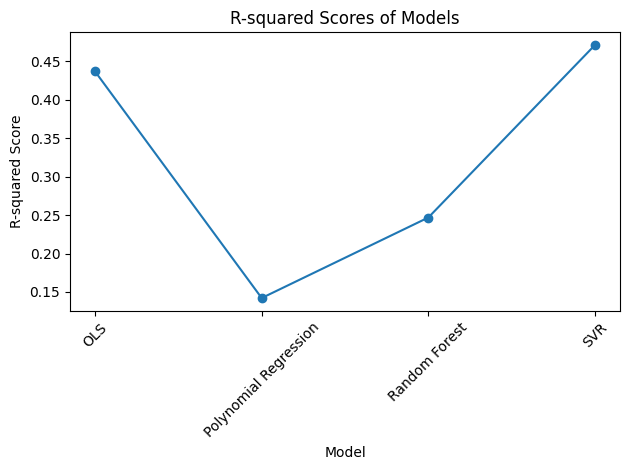

In [ ]:
models = ['OLS', 'Polynomial Regression', 'Random Forest', 'SVR']
r2_scores = [r2_ols, r2_poly, r2_rf, r2_svr]

plt.plot(models, r2_scores, marker='o')
plt.title("R-squared Scores of Models")
plt.xlabel("Model")
plt.ylabel("R-squared Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("OLS R-squared:", r2_ols)
print("Polynomial regression R-squared:", r2_poly)
print('Random forest R-squared:',r2_rf)
print('SVR R-squared:',r2_svr)

OLS R-squared: 0.43706727563027437
Polynomial regression R-squared: 0.1420949633312718
Random forest R-squared: 0.24690381798339833
SVR R-squared: 0.471477341077269


In [ ]:
r2_dict = {
    r2_ols: 'OLS',
    r2_poly: 'Polynomial Regression',
    r2_rf: 'Random Forest',
    r2_svr: 'SVR'
}

max_r2 = max(r2_dict.keys())

best_model = r2_dict[max(r2_dict.keys())]

print('Best model based on maximum R2 score:', best_model)


Best model based on maximum R2 score: SVR


#Working on dataset with Kfold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np
from sklearn.pipeline import make_pipeline

cv = KFold(n_splits=5, random_state=42, shuffle=True)

models = {
    "OLS": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

for model_name, model in models.items():
    print(f"=== {model_name} ===")
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-scores)
    print(f"RMSE: {rmse_scores.mean()} (± {rmse_scores.std()})")


=== OLS ===
RMSE: 1.0401718125952164 (± 0.1365781926033526)
=== Polynomial Regression ===
RMSE: 2.6687261697465967 (± 0.9982104528952567)
=== Random Forest ===
RMSE: 1.0109740871209643 (± 0.09479043359372033)
=== SVR ===
RMSE: 1.047063610117243 (± 0.14499465779689238)
